In [ ]:
#pip install squarify


In [ ]:
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import cv2
#import io

from skimage.io import imshow, imread
from skimage.color import rgb2hsv, hsv2rgb

import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import matplotlib
% matplotlib inline

from nltk.corpus import stopwords

import squarify    


In [ ]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("Last15DaysTickets202110181726.csv", index_col=0)

In [ ]:
df = df.replace('"','', regex=True)

In [ ]:
df = df.replace('\n',' ', regex=True)

In [ ]:
df.head()

,Technician,Módulo,Subject,Request Status,Pending Status,Completed Time,Created Time
Request ID,,,,,,,
1198,Carlos Enrique Loza Zavala,General,1238 - error de access violation en windows 8 ...,Cerrado,False,2021-10-04 15:54:00.000 -0500,2015-12-24 11:30:39.000 -0600
5391,Sonia Serrano Hernandez,Punto de venta,9515 - Pto. de Venta - error al tratar de inic...,Cerrado,False,2021-10-04 16:45:02.000 -0500,2015-12-24 11:49:45.000 -0600
25201,Adrian Munoz Hernandez,Inventarios,Inventario | Información de Costos | Empresa O...,Cerrado,False,2021-10-14 11:49:00.000 -0500,2021-06-09 18:27:03.000 -0500
25698,Sonia Serrano Hernandez,Nomina,Nómina: Dispersión Banregio,Cerrado,False,2021-10-04 10:33:33.000 -0500,2021-07-27 13:12:54.000 -0500
25834,Adrian Munoz Hernandez,Respaldos Automáticos,Error en Respaldos automáticos,Cerrado,False,2021-10-12 11:49:00.000 -0500,2021-08-05 17:27:59.000 -0500


In [ ]:
df.describe()

,Technician,Módulo,Subject,Request Status,Pending Status,Completed Time,Created Time
count,228,227,228,228,228,228,228
unique,8,20,224,6,2,203,228
top,Adrian Munoz Hernandez,PDA o Candados,Inventarios - Los datos del complemento Carta...,Cerrado,False,1969-12-31 18:00:00.000 -0600,2021-10-04 15:31:21.000 -0500
freq,58,33,3,202,210,23,1


In [ ]:
# Groupby by country
Modulo = df.groupby(['Módulo']).size().to_frame('count').reset_index()

# Summary statistic of all countries
Modulo.sort_values('count', ascending=False, inplace=True)

In [ ]:
Modulo.head(3)

,Módulo,count
12,PDA o Candados,33
18,Ventas,29
11,Nomina,27


In [ ]:
Modulo['Módulo'].head(3)

12    PDA o Candados
18            Ventas
11            Nomina
Name: Módulo, dtype: object

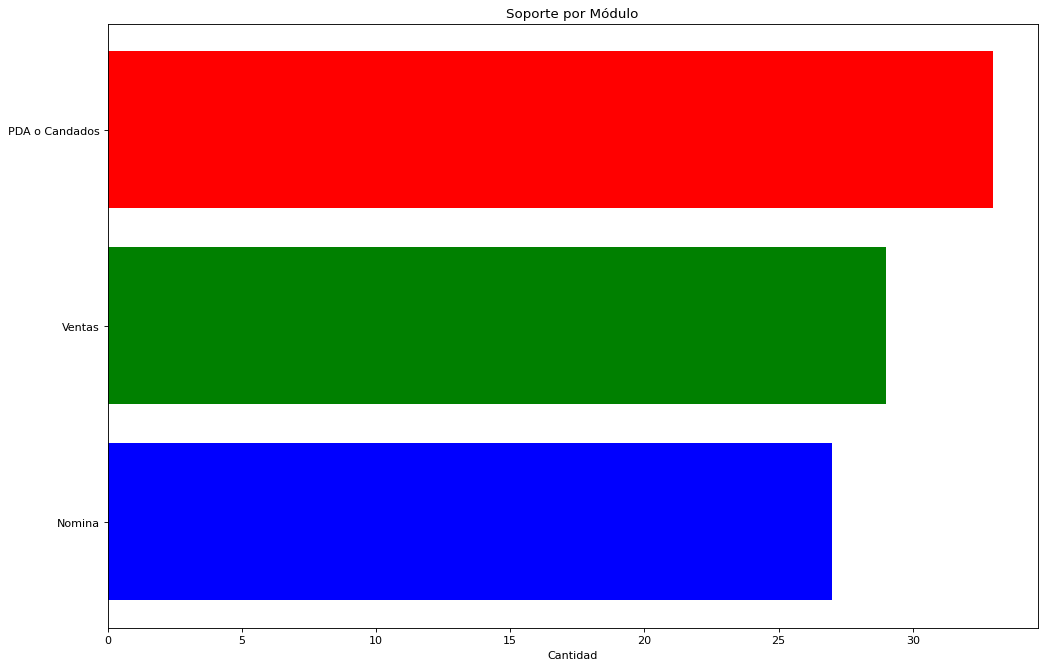

In [ ]:
#Modulo.head(3).plot.barh(x='Módulo', y='count', rot=70, title="Soporte por Módulo - Últimos 7 días");

#plot.show(block=True);
my_colors = ['r', 'g', 'b']
figure(figsize=(15, 10), dpi=80)

#fig = plt.figure()
#fig.patch.set_facecolor('black')

plt.barh(Modulo['Módulo'].head(3),Modulo['count'].head(3), color=my_colors)
plt.title('Soporte por Módulo')
#plt.ylabel('Módulo')
#plt.rcParams['axes.facecolor'] = 'black'
plt.xlabel('Cantidad')
plt.gca().invert_yaxis()
plt.savefig('plot.jpg', format='jpg')
plt.show()

In [ ]:
PlotImg = imread('plot.jpg')

In [ ]:
red_filtered = (PlotImg[:,:,0] > 150) & (PlotImg[:,:,1] < 100) & (PlotImg[:,:,2] < 110)
RedPng = PlotImg.copy()
RedPng[:, :, 0] = RedPng[:, :, 0] * red_filtered
RedPng[:, :, 1] = RedPng[:, :, 1] * red_filtered
RedPng[:, :, 2] = RedPng[:, :, 2] * red_filtered

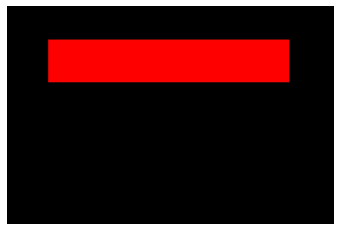

In [ ]:
plt.imshow(RedPng)
plt.axis('off')
#plt.figure(num=None, figsize=(15, 10), dpi=80)
# save figure with transparent=True argument
plt.savefig('RedSavedFig.png', transparent=True)



In [ ]:
green_filtered = (PlotImg[:,:,0] < 150) & (PlotImg[:,:,1] > 100) & (PlotImg[:,:,2] < 110)
greenPng = PlotImg.copy()
greenPng[:, :, 0] = greenPng[:, :, 0] * green_filtered
greenPng[:, :, 1] = greenPng[:, :, 1] * green_filtered
greenPng[:, :, 2] = greenPng[:, :, 2] * green_filtered

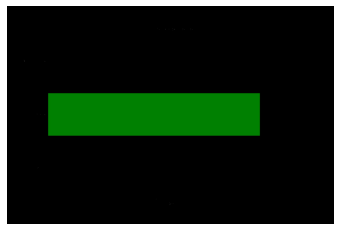

In [ ]:
plt.imshow(greenPng)
plt.axis('off')
#plt.figure(num=None, figsize=(15, 10), dpi=80)
# save figure with transparent=True argument
plt.savefig('greenSavedFig.png', transparent=True)



In [ ]:
blue_filtered = (PlotImg[:,:,0] < 150) & (PlotImg[:,:,1] < 100) & (PlotImg[:,:,2] > 110)
bluePng = PlotImg.copy()
bluePng[:, :, 0] = bluePng[:, :, 0] * blue_filtered
bluePng[:, :, 1] = bluePng[:, :, 1] * blue_filtered
bluePng[:, :, 2] = bluePng[:, :, 2] * blue_filtered

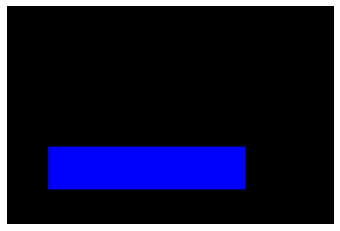

In [ ]:
plt.imshow(bluePng)
plt.axis('off')
#plt.figure(num=None, figsize=(15, 10), dpi=80)
# save figure with transparent=True argument
plt.savefig('blueSavedFig.png', transparent=True)



In [ ]:
img = Image.open('RedSavedFig.png')
rgba = img.convert("RGBA")
datas = rgba.getdata()
  
newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
        # storing a transparent value when we find a black colour
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)  # other colours remain unchanged
  
rgba.putdata(newData)
rgba.save("TransparentRedImg.png", "PNG")

In [ ]:
img = Image.open('greenSavedFig.png')
rgba = img.convert("RGBA")
datas = rgba.getdata()
  
newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
        # storing a transparent value when we find a black colour
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)  # other colours remain unchanged
  
rgba.putdata(newData)
rgba.save("TransparentGreenImg.png", "PNG")

In [ ]:
img = Image.open('blueSavedFig.png')
rgba = img.convert("RGBA")
datas = rgba.getdata()
  
newData = []
for item in datas:
    if item[0] == 0 and item[1] == 0 and item[2] == 0:  # finding black colour by its RGB value
        # storing a transparent value when we find a black colour
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)  # other colours remain unchanged
  
rgba.putdata(newData)
rgba.save("TransparentBlueImg.png", "PNG")

In [ ]:
PorEstatus = df.groupby(['Pending Status']).size().to_frame('count').reset_index()
PorEstatus

,Pending Status,count
0,False,210
1,True,18


In [ ]:
#@title Esconder celda
#df.update(df[['QuotedModulo']].applymap('"{}"'.format))

#df['QuotedModulo']

In [ ]:
Top1 = Modulo['Módulo'].iloc[0]
Top2 = Modulo['Módulo'].iloc[1]
Top3 = Modulo['Módulo'].iloc[3]


In [ ]:
Top1Text = " ".join(subject for subject in df['Subject'].loc[(df['Módulo']) == Modulo['Módulo'].iloc[0]])
Top2Text = " ".join(subject for subject in df['Subject'].loc[(df['Módulo']) == Modulo['Módulo'].iloc[1]])
Top3Text = " ".join(subject for subject in df['Subject'].loc[(df['Módulo']) == Modulo['Módulo'].iloc[2]])


In [ ]:
spa_stopwords = stopwords.words('spanish')

In [ ]:
spa_stopwords.extend(['Microsip', 'General', 'Saludo', 'hacer', 'Buen día', 'Saludo', 'cada', 'si', 'hace', 'favor', 'dia', 'dias', 'Saludos', 
                      'siguiente', 'Buenas', 'día', 'días', 'caso', 'cualquier', 'gracias', 'cualquier', 'Buen', 'Hola', 'tarde', 'tardes', 
                      'queda', 'mismo', 'queda', 'puede', 'puedes', 'permite', 'mas', 'aparece', 'nomina', 'nómina', 'https', 'bien', 'deja', 'antemano',
                      'Ventas', 'punto', 'venta', 'Sics', 'AS', 'SiCS', 'PDA',
                      'Jaime', 'Yadira', 'Adrián', 'Angélica', 'Carlos', 'Sonia', 'Enrique', 'Omar', 'José', 'Esparza', 'mex002', 'Jose', 'González'])

In [ ]:
maskRed = np.array(Image.open('TransparentRedImg.png'))
maskGreen = np.array(Image.open('TransparentGreenImg.png'))
maskBlue = np.array(Image.open('TransparentBlueImg.png'))

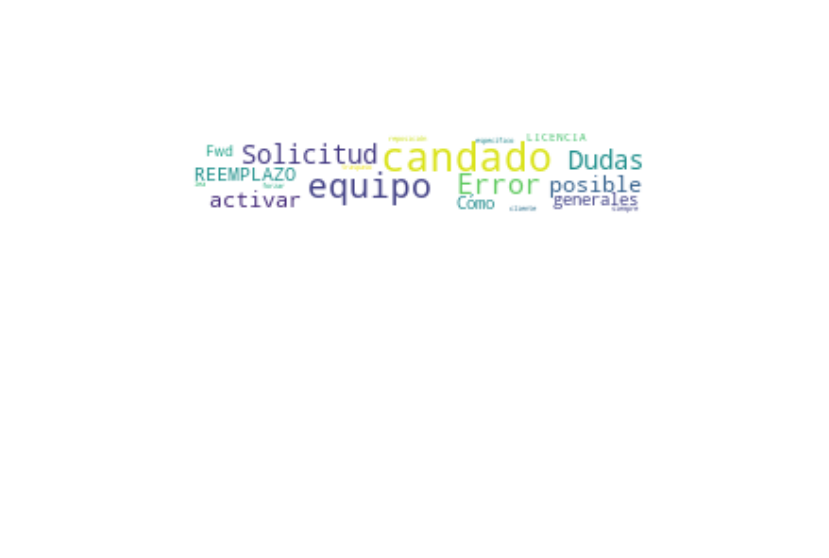

In [ ]:
wordcloud = WordCloud(stopwords=spa_stopwords, background_color="white", mask=maskRed).generate(Top1Text)

plt.rcParams["figure.figsize"] = (20,10)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('barra1.png', transparent=True)
plt.show()

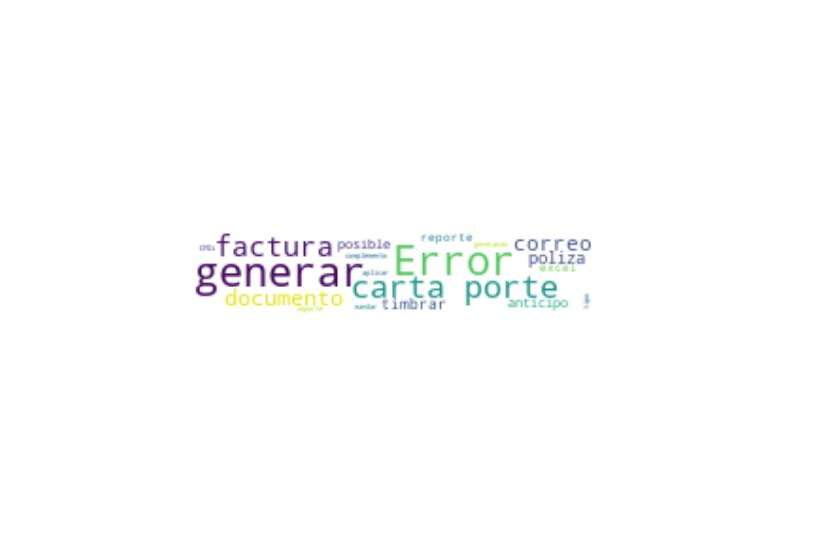

In [ ]:
wordcloud = WordCloud(stopwords=spa_stopwords, background_color="white", mask=maskGreen).generate(Top2Text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('barra2.png', transparent=True)
plt.show()

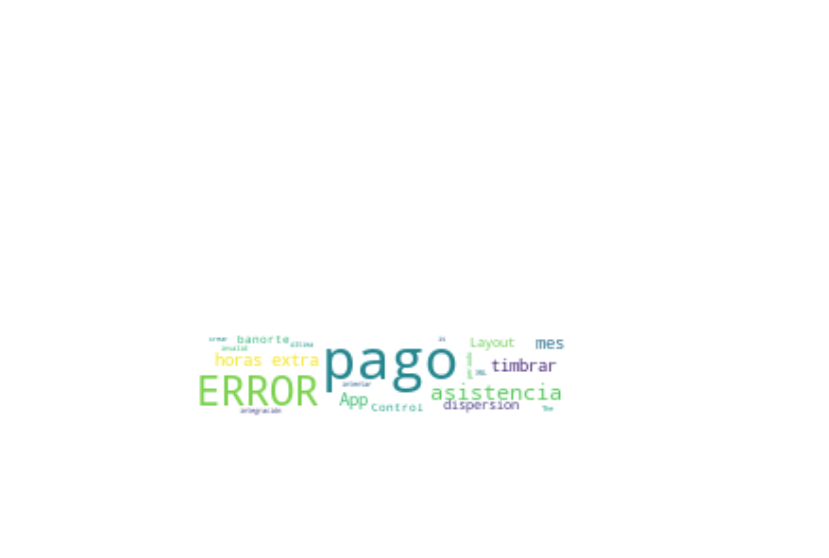

In [ ]:
wordcloud = WordCloud(stopwords=spa_stopwords, background_color="white", mask=maskBlue).generate(Top3Text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.savefig('barra3.png', transparent=True)
plt.show()

In [ ]:
img = Image.open('barra1.png')
rgba = img.convert("RGBA")
datas = rgba.getdata()
  
newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:  # finding black colour by its RGB value
        # storing a transparent value when we find a black colour
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)  # other colours remain unchanged
  
rgba.putdata(newData)
rgba.save("TransparentBarra1.png", "PNG")

In [ ]:
img = Image.open('barra2.png')
rgba = img.convert("RGBA")
datas = rgba.getdata()
  
newData = []
for item in datas:
    if item[0] == 255 and item[1] == 255 and item[2] == 255:  # finding black colour by its RGB value
        # storing a transparent value when we find a black colour
        newData.append((255, 255, 255, 0))
    else:
        newData.append(item)  # other colours remain unchanged
  
rgba.putdata(newData)
rgba.save("TransparentBarra2.png", "PNG")

In [ ]:
Barra1 = imread('TransparentBarra1.png')
Barra2 = imread('TransparentBarra2.png')

In [ ]:
(PlotImg[:,:,0] < 150) & (PlotImg[:,:,1] < 100) & (PlotImg[:,:,2] > 110)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [ ]:
(Barra1[:,:,3] != 0) & (Barra1[:, :, 3] == 255)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

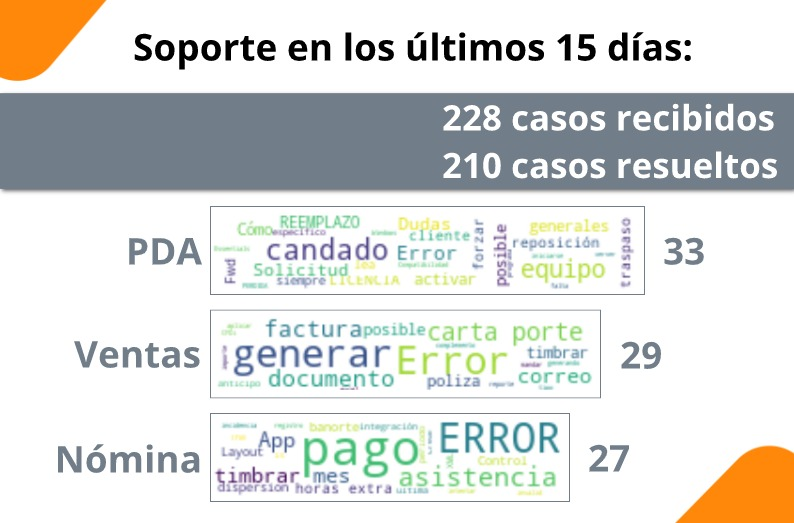

In [ ]:
from IPython.display import Image
Image(filename='Last15daysTickets.jpg') 